In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scienceplots
from itertools import zip_longest
import pandas as pd
from scipy import stats

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'font.size': 20,         #Tamaño de fuente general
    'axes.titlesize': 20,    #Tamaño de fuente para títulos de ejes
    'axes.labelsize': 20,    #Tamaño de fuente para etiquetas de ejes
    'xtick.labelsize': 20,   #Tamaño de fuente para etiquetas del eje x
    'ytick.labelsize': 20,   #Tamaño de fuente para etiquetas del eje y
    'legend.fontsize': 15,   #Tamaño de fuente para la leyenda
    'figure.titlesize': 20   #Tamaño de fuente para el título de la figura
})

plt.style.use(['science', 'grid'])

In [2]:
#leyendo el archivo
file_name_tng300 = 'Table_TNG300_snapshot99_ALL_NEWVERSION.hdf5'
tng300_file = h5py.File(file_name_tng300, 'r')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Llaves del archivo: ', list(tng300_file.keys()))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Llaves de Groups: ', list(tng300_file['Groups'].keys()))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Llaves de SubGroups: ', list(tng300_file['SubGroups'].keys()))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------------------------------------------------
Llaves del archivo:  ['Groups', 'SubGroups']
---------------------------------------------------------------------------------------------------------------------------------------------------------
Llaves de Groups:  ['GrNr_halo', 'GroupPos', 'Group_M_Crit200', 'Spin', 'c200', 'zform']
---------------------------------------------------------------------------------------------------------------------------------------------------------
Llaves de SubGroups:  ['SubhaloCM', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloMassInHalfRadType', 'SubhaloMassType', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloStellarPhotometrics_g', 'SubhaloStellarPhotometrics_i', 'SubhaloStellarPhotometrics_r', 'SubhaloStellarPhotometrics_z', 'SubhaloVel', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad', 'arrayIDGroup'

In [3]:
#extrayendo las variables del archivo como arrays individuales
#de Groups
GrNr_halo = np.asarray(tng300_file['Groups/GrNr_halo'])
GroupPos = np.asarray(tng300_file['Groups/GroupPos'])
Group_M_Crit200 = np.asarray(tng300_file['Groups/Group_M_Crit200'])
Spin = np.asarray(tng300_file['Groups/Spin'])
c200 = np.asarray(tng300_file['Groups/c200'])
zform = np.asarray(tng300_file['Groups/zform'])

#eliminando halos donde dm_mass = 0
SubhaloMassType = np.asarray(tng300_file['SubGroups/SubhaloMassType'])
dm_subhmass = SubhaloMassType[:,1]
pos_fixed_bad_subh = np.where(dm_subhmass > 10**9)[0]
print('Eliminamos valores dónde la masa de DM del subhalo fuera igual a 0 y en donde fuera menor a 10**(9), por el fuerte decaimiento de la Halo Mass Function')
print('Eliminamos '+str(round((1 - len(pos_fixed_bad_subh)/len(SubhaloMassType)) * 100, 2))+'% de la muestra disponible.')

#de SubGroups
SubhaloCM = np.asarray(tng300_file['SubGroups/SubhaloCM'])[pos_fixed_bad_subh]
SubhaloGrNr = np.asarray(tng300_file['SubGroups/SubhaloGrNr'])[pos_fixed_bad_subh]
SubhaloHalfmassRad = np.asarray(tng300_file['SubGroups/SubhaloHalfmassRad'])[pos_fixed_bad_subh]
SubhaloHalfmassRadType = np.asarray(tng300_file['SubGroups/SubhaloHalfmassRadType'])[pos_fixed_bad_subh]
SubhaloMassInHalfRadType = np.asarray(tng300_file['SubGroups/SubhaloMassInHalfRadType'])[pos_fixed_bad_subh]
SubhaloMassType = np.asarray(tng300_file['SubGroups/SubhaloMassType'])[pos_fixed_bad_subh]
gas_subhmass = SubhaloMassType[:,0]
dm_subhmass = SubhaloMassType[:,1]
stellar_subhmass = SubhaloMassType[:,4]
SubhaloPos = np.asarray(tng300_file['SubGroups/SubhaloPos'])[pos_fixed_bad_subh]
subh_posx = SubhaloPos[:,0]
subh_posy = SubhaloPos[:,1]
subh_posz = SubhaloPos[:,2]
SubhaloSFR = np.asarray(tng300_file['SubGroups/SubhaloSFR'])[pos_fixed_bad_subh]
SubhaloSFRinHalfRad = np.asarray(tng300_file['SubGroups/SubhaloSFRinHalfRad'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_g = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_g'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_i = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_i'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_r = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_r'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_z = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_z'])[pos_fixed_bad_subh]
SubhaloVel = np.asarray(tng300_file['SubGroups/SubhaloVel'])[pos_fixed_bad_subh]
SubhaloVelDisp = np.asarray(tng300_file['SubGroups/SubhaloVelDisp'])[pos_fixed_bad_subh]
SubhaloVmax = np.asarray(tng300_file['SubGroups/SubhaloVmax'])[pos_fixed_bad_subh]
SubhaloVmaxRad = np.asarray(tng300_file['SubGroups/SubhaloVmaxRad'])[pos_fixed_bad_subh]
arrayIDGroup = np.asarray(tng300_file['SubGroups/arrayIDGroup'])[pos_fixed_bad_subh]

Eliminamos valores dónde la masa de DM del subhalo fuera igual a 0 y en donde fuera menor a 10**(9), por el fuerte decaimiento de la Halo Mass Function
Eliminamos 13.76% de la muestra disponible.


Realizamos un corte en la masa del catálogo para halos de masa menores a 10**(9), por el fuerte decrecimiento en la halo mass function (no son datos confiables):


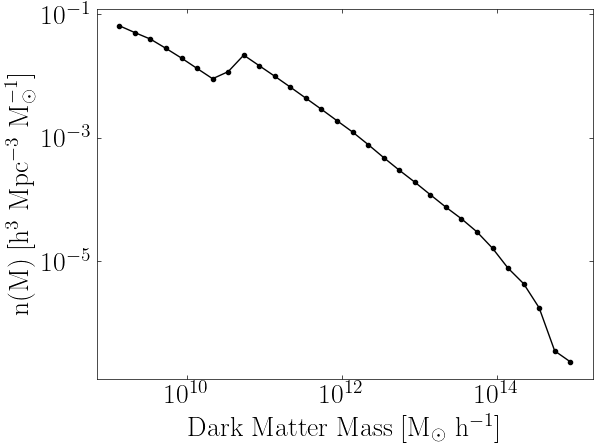

In [4]:
#vamos a realizar un corte en la masa, segun la halo mass function
print('Realizamos un corte en la masa del catálogo para halos de masa menores a 10**(9), por el fuerte decrecimiento en la halo mass function (no son datos confiables):')
vol_box_sim = 205**3 #volumen caja en unidades de [Mpc**(3)*h**(-1)]

fig = plt.figure(figsize = (6.4,4.8))
ax = fig.subplots()
N = 30
log_bins = np.logspace(np.log10(np.min(dm_subhmass)), np.log10(np.max(dm_subhmass)), N + 1)
hist, bins = np.histogram(dm_subhmass, bins = log_bins)
prom_bins = (bins[1:] + bins[:-1])/2
ax.plot(prom_bins, hist/vol_box_sim, color = 'black', marker = '.')

ax.set_xlabel(r'Dark Matter Mass [M$_{\odot}$ h$^{-1}$]')
ax.set_ylabel(r'n(M) [h$^3$ Mpc$^{-3}$ M$_{\odot}^{-1}$]')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(False)
plt.show()

Pregunta 1

In [5]:
#Para crear el array centrales = 1 y satelites = 0
central, pos_cen, subh_per_halo = np.unique(SubhaloGrNr, return_index = True, return_counts = True)
cen1_sat0 = np.zeros(len(SubhaloGrNr))
cen1_sat0[pos_cen] = 1

In [6]:
#definiendo subhalos centrales, satélites y todo el sample
subh_sat_per_halo = subh_per_halo - 1
subh_cen_per_halo = subh_per_halo - subh_sat_per_halo
subh_all_per_halo = subh_per_halo

In [7]:
#criterio de masa estelar, para considerar cuando hay una galaxia y cuando no
pos_central_subh = np.where(cen1_sat0 == 1)[0]
pos_sat_subh = np.where(cen1_sat0 == 0)[0]
stellar_mass_cen = stellar_subhmass[pos_central_subh]
stellar_mass_sat = stellar_subhmass[pos_sat_subh]
no_stellar_mass_cen = np.where(stellar_mass_cen <= 10**9)[0]
no_stellar_mass_sat = np.where(stellar_mass_sat <= 10**9)[0]
no_stellar_mass_all = np.where(stellar_subhmass <= 10**9)[0]

In [8]:
#aplicando criterio de la masa estelar para centrales, satélites y todo el sample
#para galaxias centrales
no_mass_group_number_cen = SubhaloGrNr[pos_central_subh][no_stellar_mass_cen]
ids_group_cen_no_mass, _, subh_per_halo_cen_no_mass = np.unique(no_mass_group_number_cen, return_index = True, return_counts = True)
eq_index_cen, pos_cennomass_in_halo, pos_no_mass_cen = np.intersect1d(GrNr_halo, ids_group_cen_no_mass, return_indices = True)
subh_cen_per_halo[pos_cennomass_in_halo] -= subh_per_halo_cen_no_mass
#para galaxias satélites
no_mass_group_number_sat = SubhaloGrNr[pos_sat_subh][no_stellar_mass_sat]
ids_group_sat_no_mass, _, subh_per_halo_sat_no_mass = np.unique(no_mass_group_number_sat, return_index = True, return_counts = True)
eq_index_sat, pos_satnomass_in_halo, pos_no_mass_sat = np.intersect1d(GrNr_halo, ids_group_sat_no_mass, return_indices = True)
subh_sat_per_halo[pos_satnomass_in_halo] -= subh_per_halo_sat_no_mass
#para todo el sample
no_mass_group_number_all = SubhaloGrNr[no_stellar_mass_all]
ids_group_all_no_mass, _, subh_per_halo_all_no_mass = np.unique(no_mass_group_number_all, return_index = True, return_counts = True)
eq_index_all, pos_allnomass_in_halo, pos_no_mass_all = np.intersect1d(GrNr_halo, ids_group_all_no_mass, return_indices = True)
subh_all_per_halo[pos_allnomass_in_halo] -= subh_per_halo_all_no_mass

In [9]:
gal_per_halo_cen = subh_cen_per_halo
gal_per_halo_sat = subh_sat_per_halo
gal_per_halo_all = subh_all_per_halo

In [10]:
#para realizar el HOD por bin de masa
dm_halo_mass = Group_M_Crit200
all_sample_HOD = gal_per_halo_all
sat_HOD = gal_per_halo_sat
cen_HOD = gal_per_halo_cen
N = 15 #numero de bins
#definir bins
bins_dm_halo = np.logspace(np.log10(min(dm_halo_mass)), np.log10(max(dm_halo_mass)), N + 1 ) 

#calcular el promedio de all_sample_HOD por bin de masa
HOD_per_bins, bin_edges, binnumber = stats.binned_statistic(dm_halo_mass, all_sample_HOD, statistic='mean', bins=bins_dm_halo)

#calcular el promedio de sat_HOD por bin de masa
HOD_per_bins_sat, bin_edges_sat, binnumber = stats.binned_statistic(dm_halo_mass, sat_HOD, statistic='mean', bins=bins_dm_halo)

#calcular el promedio de cen_HOD por bin de masa
HOD_per_bins_cen, bin_edges_cen, binnumber = stats.binned_statistic(dm_halo_mass, cen_HOD, statistic='mean', bins=bins_dm_halo)

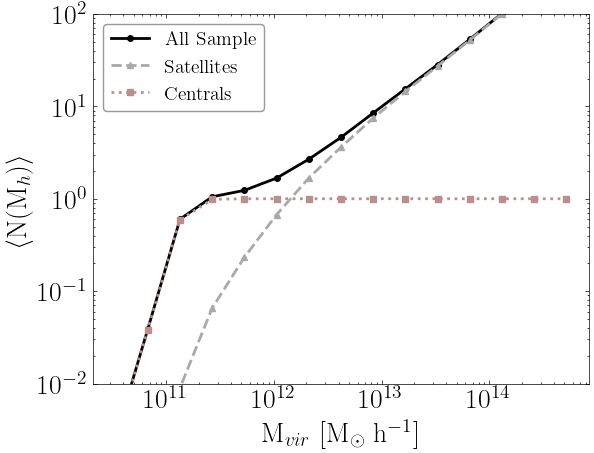

In [11]:
fig = plt.figure(figsize = (6.4,4.8))
ax = fig.subplots()
ax.plot(bin_edges[:-1], HOD_per_bins, label = 'All Sample', color = 'black', lw = 2, zorder = 1, marker = 'o', ms = 4)
ax.plot(bin_edges_sat[:-1], HOD_per_bins_sat, label = 'Satellites', color = 'darkgray', lw = 2, ls = '--', zorder = 2, marker = '^', ms = 4)
ax.plot(bin_edges_cen[:-1], HOD_per_bins_cen, label = 'Centrals', color = 'rosybrown', lw = 2, ls = ':', zorder = 3, marker = 's', ms = 4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'M$_{vir}$ [M$_{\odot}$ h$^{-1}$]')
ax.set_ylabel(r'$\langle$N(M$_h$)$\rangle$')
ax.legend(framealpha = 0.4, edgecolor = (0,0,0,1), fontsize = 14)
ax.set_ylim(10**(-2), 10**2)
ax.grid(False)
#fig.savefig('images/HOD_cen_sat_all.png', dpi = 600)
plt.show()

In [12]:
#funciones para realizar el ajuste
from scipy.special import erf
from scipy.optimize import curve_fit

def centrals_HOD_fit(log_mass_array, log_mass_min, sigma_log_m):
    HOD_cen_fit = 0.5*( 1 + erf( (log_mass_array - log_mass_min)/(sigma_log_m) ) )
    return HOD_cen_fit

def satellite_HOD_fit(log_array_mass, log_m_cut, log_mass_1, alpha):
    Mh = 10**log_array_mass
    M_cut = 10**log_m_cut
    M1_star = 10**log_mass_1
    HOD_sat_fit = np.zeros_like(Mh)
    #evitar valores negativos o cero dividiendo
    mask = Mh > M_cut
    HOD_sat_fit[mask] = ( (Mh[mask] - M_cut)/(M1_star) )**alpha
    return HOD_sat_fit

def all_HOD_fit(cen_HOD_fit, sat_HOD_fit):
    all_HOD = cen_HOD_fit + sat_HOD_fit
    return all_HOD

In [13]:
#realizando el ajuste para centrales, satélites, y todo el sample
#ajuste para centrales
log_dm_mass_halo_host_cen = np.log10(bin_edges_cen[:-1])
res_cen_HOD_fit, cov_cen_HOD_fit = curve_fit(centrals_HOD_fit, log_dm_mass_halo_host_cen, HOD_per_bins_cen, p0 = [12, 0.2])
log_mass_min, sigma_log_m = res_cen_HOD_fit
err_log_mass_min, err_sima_log_m =  round((cov_cen_HOD_fit[0,0])**(0.5), 4), round((cov_cen_HOD_fit[1,1])**(0.5), 4)
y_HOD_cen_fit = centrals_HOD_fit(log_dm_mass_halo_host_cen, log_mass_min, sigma_log_m)
#ajuste para satélites
log_dm_mass_halo_host_sat = np.log10(bin_edges_sat[:-1])
bounds = ([11.15, 12, 1], [11.5, 12.5, 1.05])
res_sat_HOD_fit, cov_sat_HOD_fit = curve_fit(satellite_HOD_fit, log_dm_mass_halo_host_sat, HOD_per_bins_sat, p0 = [11.4, 12.5, 1.02], bounds = bounds, maxfev=10**7)
m_cut, mass_1, alpha = res_sat_HOD_fit
err_m_cut, err_mass_1, err_alpha =  round((cov_sat_HOD_fit[0,0])**(0.5), 4), round((cov_sat_HOD_fit[1,1])**(0.5), 2), round((cov_sat_HOD_fit[2,2])**(0.5), 4)
y_HOD_sat_fit = satellite_HOD_fit(log_dm_mass_halo_host_sat, m_cut, mass_1, alpha)
#ajuste para todo el sample
log_dm_mass_halo_host_all = np.log10(bin_edges[:-1])
y_HOD_all_fit = all_HOD_fit(y_HOD_cen_fit, y_HOD_sat_fit)

print('-----------------------------------------')
print('Centrals fit: ')
print('log_mass_min = '+str(round(log_mass_min,4))+' +- '+str(err_log_mass_min))
print('sigma_log_m = '+str(round(sigma_log_m,3))+' +- '+str(err_sima_log_m))
print('-----------------------------------------')
print('Satellites fit: ')
print('m_cut = '+str(round(m_cut,4))+' +- '+str(err_m_cut))
print('mass_1 = '+str(round(mass_1, 2))+' +- '+str(err_mass_1))
print('alpha = '+str(round(alpha, 4))+' +- '+str(alpha))
print('-----------------------------------------')
print('All Sample fit: ')
print('All fit = Centrals fit + Satellites fit (five parameters fit)')

-----------------------------------------
Centrals fit: 
log_mass_min = 11.0931 +- 0.0003
sigma_log_m = 0.212 +- 0.001
-----------------------------------------
Satellites fit: 
m_cut = 11.15 +- 10.0977
mass_1 = 12.22 +- 0.08
alpha = 1.0394 +- 1.0394314407657193
-----------------------------------------
All Sample fit: 
All fit = Centrals fit + Satellites fit (five parameters fit)


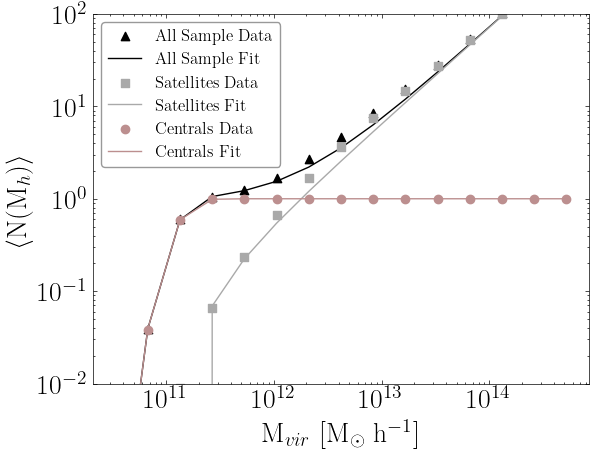

In [18]:
fig = plt.figure(figsize = (6.4,4.8))
ax = fig.subplots()

ax.scatter(10**log_dm_mass_halo_host_all, HOD_per_bins, label = 'All Sample Data', color = 'black', zorder = 1, marker = '^')
ax.plot(10**log_dm_mass_halo_host_all, y_HOD_all_fit, label = 'All Sample Fit', color = 'black', zorder = 1)

ax.scatter(10**log_dm_mass_halo_host_sat, HOD_per_bins_sat, label = 'Satellites Data', color = 'darkgray', zorder = 2, marker = 's')
ax.plot(10**log_dm_mass_halo_host_sat, y_HOD_sat_fit, label = 'Satellites Fit', color = 'darkgray', zorder = 2)

ax.scatter(10**log_dm_mass_halo_host_cen, HOD_per_bins_cen, label = 'Centrals Data', color = 'rosybrown', zorder = 3, marker = 'o')
ax.plot(10**log_dm_mass_halo_host_cen, y_HOD_cen_fit, label = 'Centrals Fit', color = 'rosybrown', zorder = 3)

ax.axvline()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'M$_{vir}$ [M$_{\odot}$ h$^{-1}$]')
ax.set_ylabel(r'$\langle$N(M$_h$)$\rangle$')
ax.legend(framealpha = 0.4, edgecolor = 'black', fontsize = 12, loc = 'upper left')
ax.set_ylim(10**(-2), 10**2)
ax.grid(False)
fig.savefig('images/HOD_cen_sat_all_fit.png', dpi = 600)
plt.show()

In [ ]:
#np.save('arrays_fit/dm_mass_halo_host_all_mass12.npy', 10**log_dm_mass_halo_host_all)
#np.save('arrays_fit/y_HOD_all_fit_mass12.npy', y_HOD_all_fit)